In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [14]:
df = pd.read_csv(r'C:\Users\Roshni\RMPS & Co\RMP.ai - AiExtensive\Ai Extensive\Ecom BI\Orders\MDirect_Orders_Report_.csv')
df.head()

,Seller Id,Warehouse Id,Store Order Id,Order Release Id,Order Line Id,Seller Order Id,Order Id FK,Created On,Style ID,Seller SKU Code,...,Final Amount,Total Mrp,Discount,Coupon Discount,Shipping Charge,Gift Charge,Tax Recovery,City,State,Zipcode
0,18500,29954,'125638576564281092203,7749510614,9749488352,afff979d-634d-499e-a51a-65276f314760,5093698237,46:35.0,22062266,N_YS31_Red,...,782.0,2899.0,2117,0,0,0,0,Thane,MH,400614
1,18500,29954,'125798964362734630803,7771075762,9771053599,9cb6e369-f157-435f-84e8-61bbc0cbcbf1,5105245592,17:52.0,23231234,S_SD33 Rama,...,948.0,4991.0,4043,83,0,0,0,Thane,MH,421204
2,18500,29954,'125738184215167353903,7763521947,9763499707,0baa4945-4892-4dd5-bdff-b99e3aa1443e,5101145633,27:50.0,22062270,N_YS31_NBlue,...,898.0,2899.0,2001,0,0,0,0,Ahmed Nagar,MH,414103
3,18500,29954,'125638576564281092203,7749510608,9749488346,d6f08326-db58-4f72-88ad-c04e5d49a21a,5093698237,46:34.0,22062264,N_YS31_BGreen,...,782.0,2899.0,2117,0,0,0,0,Thane,MH,400614
4,18500,29954,'125769803078659112503,7767772009,9767749785,8d624985-59c5-44c8-8e43-b85b46d7ba1e,5103351335,17:39.0,21131846,Marigold_Orange.,...,3299.0,19999.0,16400,300,0,0,0,Suryapet,TG,508213


In [ ]:
df.corr

In [ ]:
df.info()

In [17]:
df['Seller Id'].unique()
df['Warehouse Id'].unique()
df['Quantity'].unique()
df['Size'].unique()
df['Seller Warehouse Id'].unique()

array([29954])

**Total Sales Analysis**


(1) Total Revenue Generated and  (2)Total Number of Orders

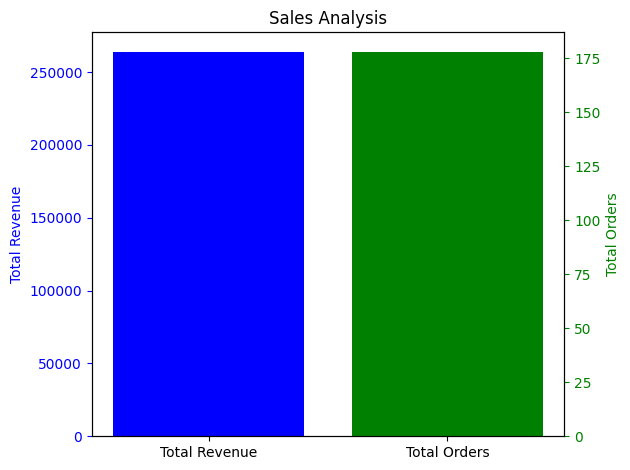

(np.float64(264136.5), 178)

In [18]:
# (1) Total Revenue
total_revenue = df['Final Amount'].sum()

# (2) Total Number of Orders
total_orders = df['Order Id FK'].nunique()

# Bar Chart for Total Revenue and Total Number of Orders
fig, ax1 = plt.subplots()

ax1.bar('Total Revenue', total_revenue, color='b')
ax1.set_ylabel('Total Revenue', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.bar('Total Orders', total_orders, color='g')
ax2.set_ylabel('Total Orders', color='g')
ax2.tick_params('y', colors='g')

plt.title('Sales Analysis')
fig.tight_layout()
plt.show()

total_revenue, total_orders

In [19]:
df['Created On'].unique()

array(['46:35.0', '17:52.0', '27:50.0', '46:34.0', '17:39.0', '46:32.0',
       '13:57.0', '20:31.0', '50:21.0', '49:25.0', '00:46.0', '31:54.0',
       '02:30.0', '10:13.0', '35:45.0', '05:14.0', '27:51.0', '05:51.0',
       '11:51.0', '26:14.0', '00:25.0', '45:17.0', '19:01.0', '05:16.0',
       '53:56.0', '39:16.0', '04:27.0', '03:39.0', '40:38.0', '38:43.0',
       '59:58.0', '40:43.0', '25:22.0', '32:08.0', '25:09.0', '53:42.0',
       '41:16.0', '42:27.0', '27:19.0', '50:56.0', '53:38.0', '44:25.0',
       '44:51.0', '17:53.0', '53:12.0', '29:31.0', '42:39.0', '33:13.0',
       '18:47.0', '32:47.0', '23:58.0', '10:02.0', '53:07.0', '25:13.0',
       '40:47.0', '58:45.0', '13:58.0', '37:13.0', '34:36.0', '24:39.0',
       '41:47.0', '13:46.0', '06:51.0', '34:42.0', '32:24.0', '21:05.0',
       '09:41.0', '49:36.0', '56:42.0', '29:17.0', '24:40.0', '40:32.0',
       '21:34.0', '59:20.0', '20:23.0', '08:27.0', '18:42.0', '09:45.0',
       '18:24.0', '18:27.0', '05:15.0', '39:20.0', 

Conclusion :
Total Revenue Generated: ₹264,136.50
Total Number of Orders Placed: 178

**Order Status Breakdown**
(1) Orders C/F/SH/RTO
(2) Highest Return Rates

In [20]:
order_status_counts = df['Order Status'].value_counts()
order_status_counts

Order Status
C      158
F       31
SH      19
RTO     10
Name: count, dtype: int64

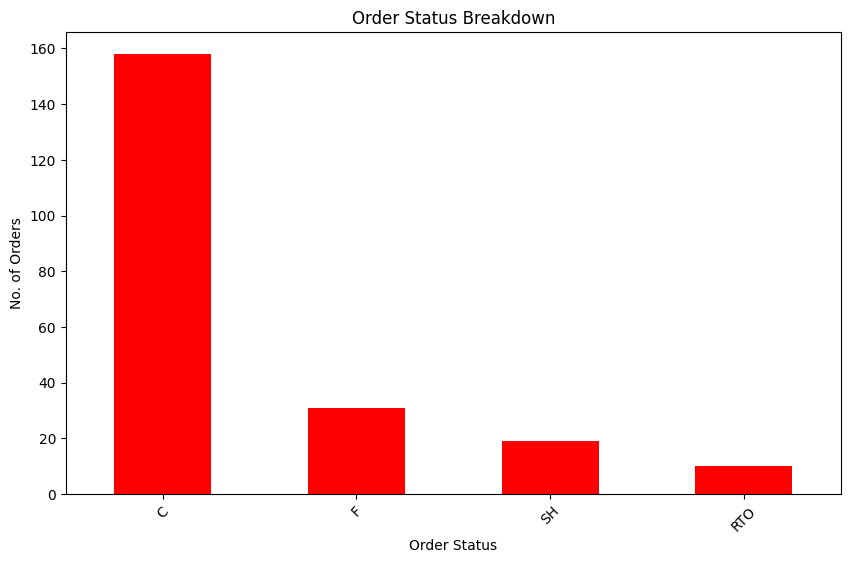

In [21]:
plt.figure(figsize=(10,6))
order_status_counts.plot(kind='bar', color='red')
plt.title('Order Status Breakdown')
plt.xlabel('Order Status')
plt.ylabel('No. of Orders')
plt.xticks(rotation=45)
plt.show()

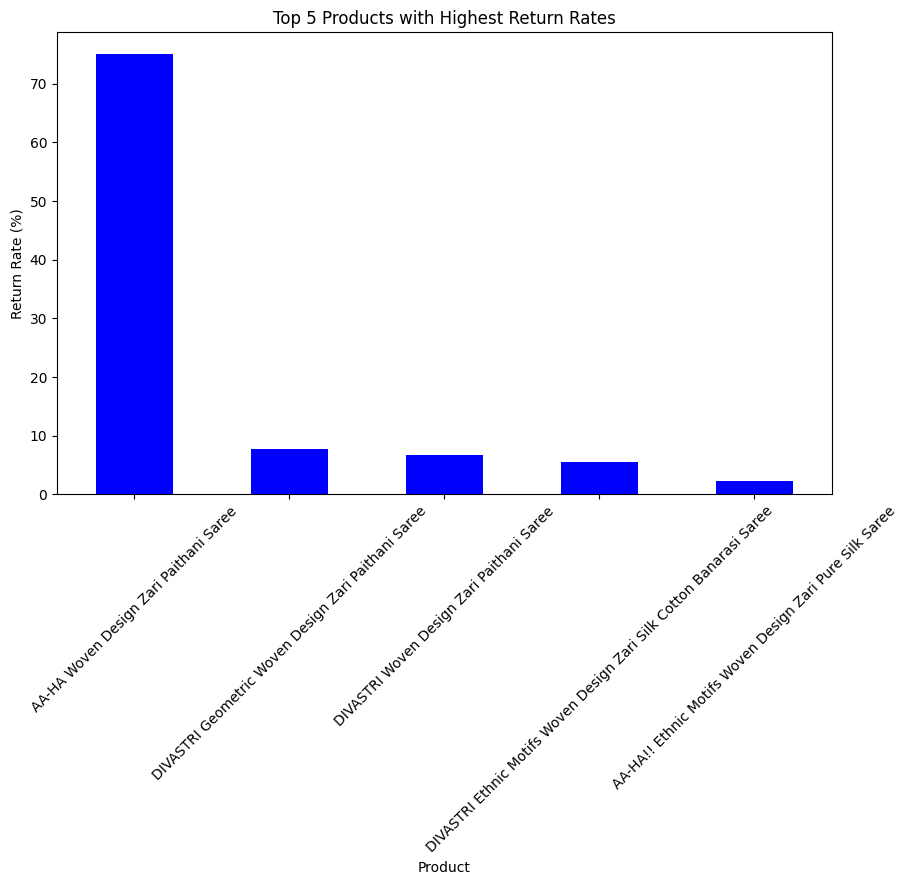

In [22]:
# return orders (assuming 'RTO' status indicates a return)
return_df = df[df['Order Status'] == 'RTO']

# total quantity sold
total_sold = df.groupby('Style Name')['Quantity'].sum()

# total quantity returned
total_returned = return_df.groupby('Style Name')['Quantity'].sum()

# return rate
return_rate = (total_returned / total_sold) * 100
return_rate = return_rate.fillna(0)
top_return_rates = return_rate.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_return_rates.plot(kind='bar', color='blue')
plt.title('Top 5 Products with Highest Return Rates')
plt.xlabel('Product')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Order Status Breakdown Conclusion :
Delivered (C): 158 orders
Cancelled (F): 31 orders
Shipped (SH): 19 orders
Returned (RTO): 10 orders

**Top Selling Products**
1) By Quantity
2) Highest Revenue

In [23]:
top_products_by_quantity = df.groupby('Style Name')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products_by_quantity

Style Name
AA-HA!! Ethnic Motifs Woven Design Zari Pure Silk Saree                43
DIVASTRI Ethnic Motifs Woven Design Zari Paithani Saree                19
DIVASTRI Ethnic Motifs Woven Design Zari Silk Cotton Banarasi Saree    18
AA-HA Ethnic Motifs Zari Paithani Saree                                15
DIVASTRI Woven Design Zari Paithani Saree                              15
Name: Quantity, dtype: int64

In [24]:

top_products_by_revenue = df.groupby('Style Name')['Final Amount'].sum().sort_values(ascending=False).head(5)
top_products_by_revenue

Style Name
AA-HA!! Ethnic Motifs Woven Design Zari Pure Silk Saree                47232.0
DIVASTRI Ethnic Motifs Woven Design Zari Paithani Saree                21516.0
DIVASTRI Ethnic Motifs Woven Design Zari Silk Cotton Banarasi Saree    19052.0
AA-HA Ethnic Motifs Zari Paithani Saree                                17841.0
DIVASTRI Woven Design Zari Paithani Saree                              15065.5
Name: Final Amount, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'AA-HA!! Ethnic Motifs Woven Design Zari Pure Silk Saree'),
  Text(1, 0, 'DIVASTRI Ethnic Motifs Woven Design Zari Paithani Saree'),
  Text(2, 0, 'DIVASTRI Ethnic Motifs Woven Design Zari Silk Cotton Banarasi Saree'),
  Text(3, 0, 'AA-HA Ethnic Motifs Zari Paithani Saree'),
  Text(4, 0, 'DIVASTRI Woven Design Zari Paithani Saree')])

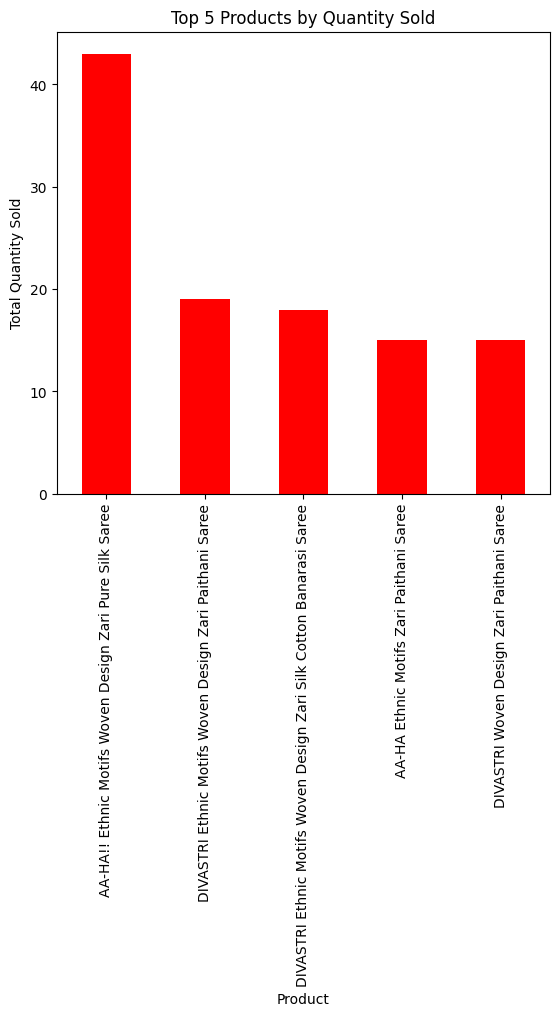

In [25]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
top_products_by_quantity.plot(kind='bar', color='red')
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)

C:\Users\Roshni\AppData\Local\Temp\ipykernel_13652\4021593081.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


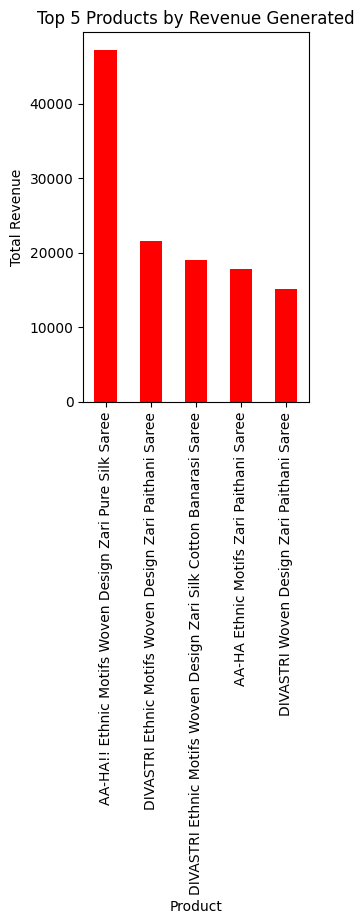

In [26]:
plt.subplot(1, 2, 2)
top_products_by_revenue.plot(kind='bar', color='red')
plt.title('Top 5 Products by Revenue Generated')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Sales by Category**
1) Quantity sold vs Article Type
2) Revenue Generated vs Article Type

In [27]:
qs_by_articletype = df.groupby('Article Type')['Quantity'].sum().sort_values(ascending= False)
qs_by_articletype

Article Type
Sarees        198
Kurta Sets     17
Kurtas          2
Tunics          1
Name: Quantity, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Sarees'),
  Text(1, 0, 'Kurta Sets'),
  Text(2, 0, 'Kurtas'),
  Text(3, 0, 'Tunics')])

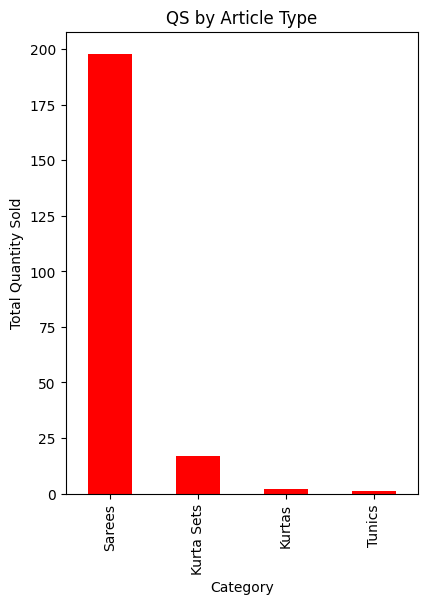

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
qs_by_articletype.plot(kind='bar', color='red')
plt.title('QS by Article Type')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)

In [29]:
tr_by_articletype = df.groupby('Article Type')['Final Amount'].sum().sort_values(ascending=False)
tr_by_articletype

Article Type
Sarees        242972.5
Kurta Sets     18867.0
Kurtas          1598.0
Tunics           699.0
Name: Final Amount, dtype: float64

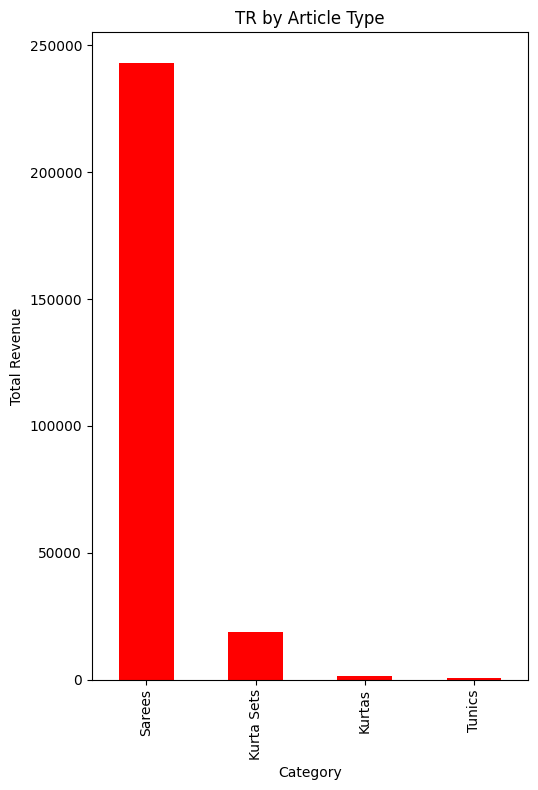

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,2)
tr_by_articletype.plot(kind='bar', color='red')
plt.title('TR by Article Type')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Sales by Brand**
(1) Revenue by Brand
(2) Quantity by Brand

In [31]:
sales_by_brand_quantity = df.groupby('Brand')['Quantity'].sum().sort_values(ascending=False)
sales_by_brand_quantity

Brand
AA-HA!!     112
DIVASTRI    106
Name: Quantity, dtype: int64

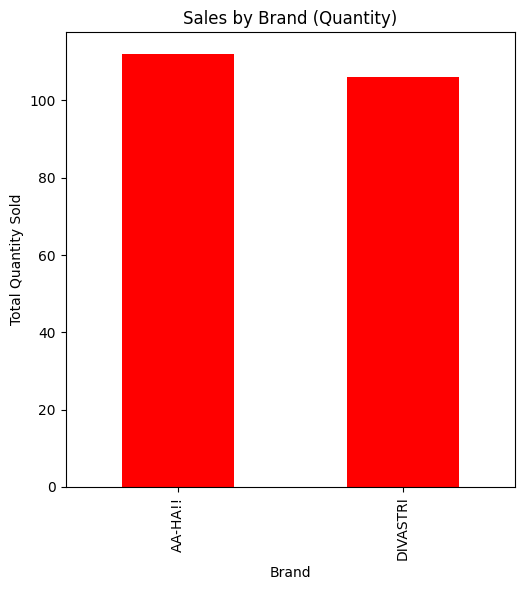

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sales_by_brand_quantity.plot(kind='bar', color='red')
plt.title('Sales by Brand (Quantity)')
plt.xlabel('Brand')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
sales_by_brand_revenue = df.groupby('Brand')['Final Amount'].sum().sort_values(ascending=False)
sales_by_brand_revenue

Brand
AA-HA!!     150313.0
DIVASTRI    113823.5
Name: Final Amount, dtype: float64

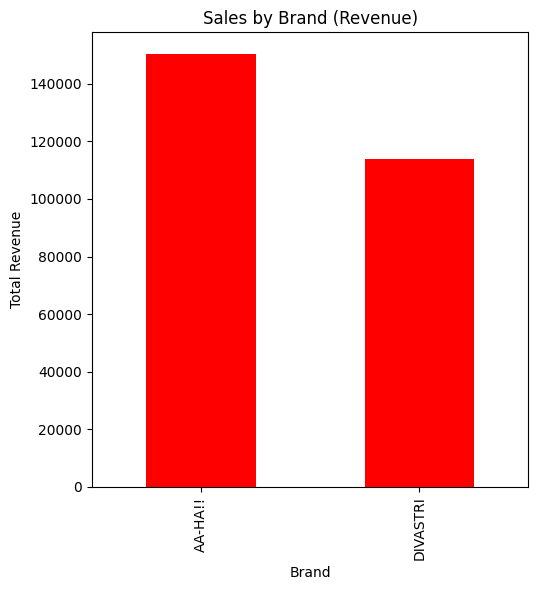

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
sales_by_brand_revenue.plot(kind='bar', color='red')
plt.title('Sales by Brand (Revenue)')
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Geographical Distribution of Sales**
(1) By City
(2) By State

In [35]:
qs_by_city = df.groupby('City')['Quantity'].sum().sort_values(ascending=False)
qs_by_city

City
Mumbai           21
Thane            18
Pune             14
Allahabad         9
Hyderabad         8
                 ..
Vadodara          1
Varanasi          1
Visakhapatnam     1
Wagholi           1
Yavatmal          1
Name: Quantity, Length: 105, dtype: int64

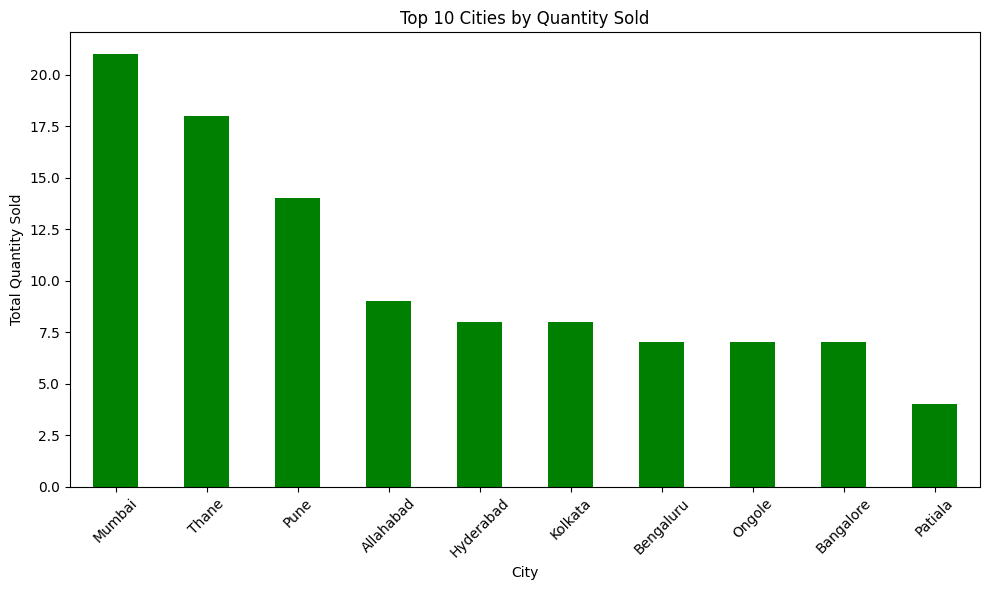

In [36]:
plt.figure(figsize=(10, 6))
qs_by_city.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Cities by Quantity Sold')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
qs_by_state = df.groupby('State')['Quantity'].sum().sort_values(ascending=False).reset_index()
qs_by_state

,State,Quantity
0,MH,76
1,UP,23
2,KA,18
3,AP,16
4,WB,13
5,TG,10
6,OR,8
7,MP,7
8,PB,7
9,GA,5


<Figure size 1000x600 with 0 Axes>

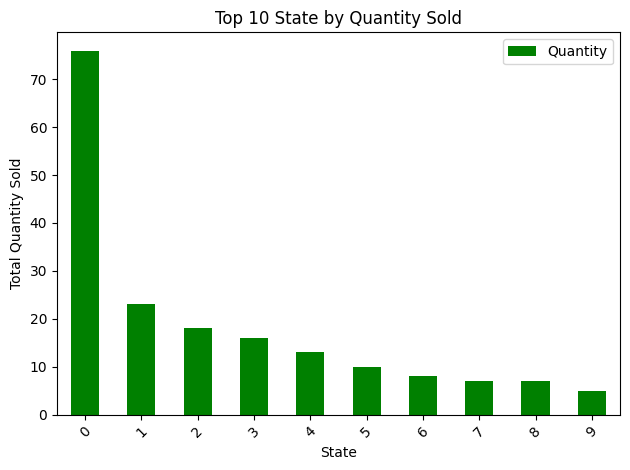

In [38]:
plt.figure(figsize=(10, 6))
qs_by_state.head(10).plot(kind='bar', color='green')
plt.title('Top 10 State by Quantity Sold')
plt.xlabel('State')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
state_mapping = {
    'MH': 'Maharashtra',
    'KA': 'Karnataka',
    'TN': 'Tamil Nadu',
    'UP': 'Uttar Pradesh',
    'GJ': 'Gujarat',
    'WB': 'West Bengal',
    'RJ': 'Rajasthan',
    'MP': 'Madhya Pradesh',
    'BR': 'Bihar',
    'AP': 'Andhra Pradesh',
    'TG': 'Telangana',
    'TS': 'Telangana',
    'KL': 'Kerala',
    'OR': 'Odisha',
    'HR': 'Haryana',
    'PB': 'Punjab',
    'AS': 'Assam',
    'JH': 'Jharkhand',
    'CT': 'Chhattisgarh',
    'UT': 'Uttarakhand',
    'HP': 'Himachal Pradesh',
    'TR': 'Tripura',
    'ML': 'Meghalaya',
    'MN': 'Manipur',
    'NL': 'Nagaland',
    'GA': 'Goa',
    'AR': 'Arunachal Pradesh',
    'MZ': 'Mizoram',
    'SK': 'Sikkim',
    'AN': 'Andaman and Nicobar Islands',
    'CH': 'Chandigarh',
    'DN': 'Dadra and Nagar Haveli',
    'DD': 'Daman and Diu',
    'LD': 'Lakshadweep',
    'DL': 'Delhi',
    'JK': 'Jammu and Kashmir',
    'LA': 'Ladakh',
    'PY': 'Puducherry'
}

In [40]:
df[['State','Quantity']]
qs_by_state = df.groupby('State')['Quantity'].sum().sort_values(ascending=False).reset_index()
qs_by_state['Comp_State'] = qs_by_state['State']

for i,r in qs_by_state.iterrows():
  print(r['State'],r['Comp_State'])
  qs_by_state.loc[i,'Comp_State'] = state_mapping[r['Comp_State']]

MH MH
UP UP
KA KA
AP AP
WB WB
TG TG
OR OR
MP MP
PB PB
GA GA
GJ GJ
TN TN
RJ RJ
BR BR
AS AS
HR HR
DL DL
TS TS
KL KL
JH JH
CT CT
CH CH
JK JK
ML ML
UT UT


In [41]:
df['Comp_State'] = df['State'].map(state_mapping)
qs_by_state = df.groupby('Comp_State')['Quantity'].sum().reset_index()

fig_quantity = fig = px.choropleth(
    data_frame= qs_by_state,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='Comp_State',
    color='Quantity',
    color_continuous_scale='Reds'
)

fig_quantity.update_geos(fitbounds="locations", visible=True)
fig_quantity.show()

NameError: name 'px' is not defined

**Order Fulfillment Analysis**
(1) Avg time from order placing to shipped
(2) Avg time from order shipped to delivery

In [ ]:
df['Created On'] = pd.to_datetime(df['Created On'], errors='coerce')
df['Shipped On'] = pd.to_datetime(df['Shipped On'], errors='coerce')
df['Delivered On'] = pd.to_datetime(df['Delivered On'], errors='coerce')

# time differences
df['Time to Ship'] = (df['Shipped On'] - df['Created On']).dt.total_seconds() / 3600  # in hours
df['Time to Deliver'] = (df['Delivered On'] - df['Shipped On']).dt.total_seconds() / 3600  # in hours

# avg times
avg_time_to_ship = df['Time to Ship'].mean()
avg_time_to_deliver = df['Time to Deliver'].mean()
avg_time_to_ship, avg_time_to_deliver

(-0.5490196078431371, -2.152173913043478)

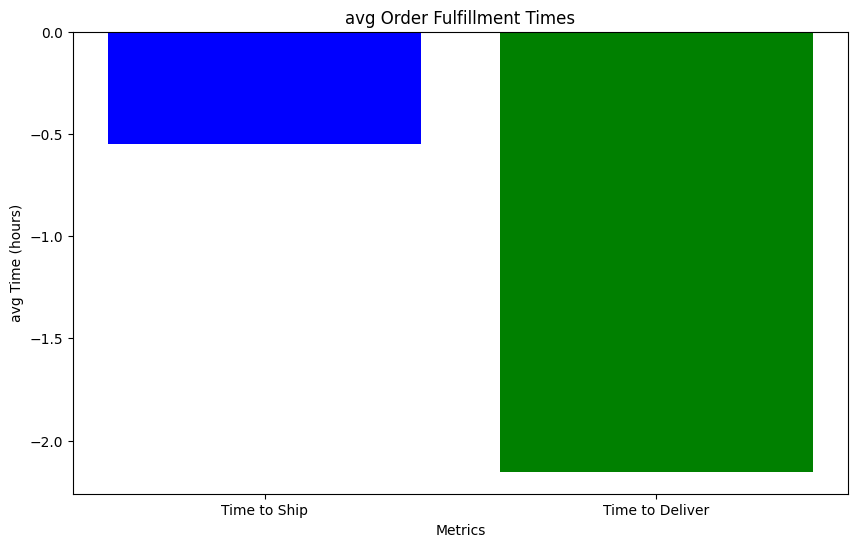

In [ ]:
metrics = ['Time to Ship', 'Time to Deliver']
avg_times = [avg_time_to_ship, avg_time_to_deliver]
plt.figure(figsize=(10, 6))
plt.bar(metrics, avg_times, color=['blue', 'green'])
plt.title('avg Order Fulfillment Times')
plt.xlabel('Metrics')
plt.ylabel('avg Time (hours)')
plt.show()

**Discounts Analysis**
(1) Total discount
(2) Total discount coupon used
(3) Avg discount per order
(4) Impact of discounts

In [ ]:
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Coupon Discount'] = pd.to_numeric(df['Coupon Discount'], errors='coerce')

# total discounts
total_disc = df['Discount'].sum()
total_coupon_disc = df['Coupon Discount'].sum()

# avg discount per order
avg_disc_per_order = df['Discount'].mean()

total_disc, total_coupon_disc, avg_disc_per_order


(826584, 5365, 3791.669724770642)

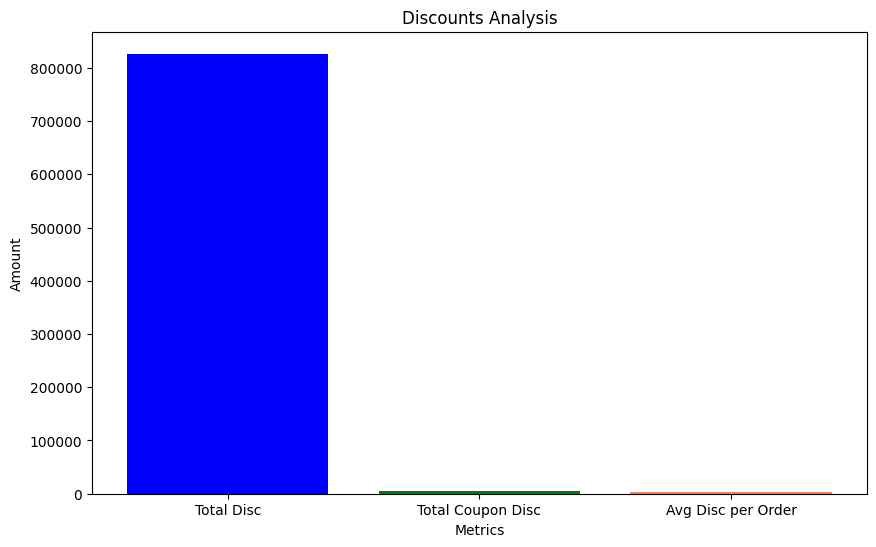

In [ ]:
metrics = ['Total Disc', 'Total Coupon Disc', 'Avg Disc per Order']
values = [total_disc, total_coupon_disc, avg_disc_per_order]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'coral'])
plt.title('Discounts Analysis')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.show()

In [ ]:
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# total disc product wise
total_discount = df.groupby('Style Name')['Discount'].sum()

# total sales volume product wise
total_sales_volume = df.groupby('Style Name')['Quantity'].sum()

discount_sales_df = pd.DataFrame({
    'Total Discount': total_discount,
    'Total Sales Volume': total_sales_volume
}).reset_index()

discount_sales_df = discount_sales_df.dropna()

# correlation between discount and sales volume
discount_sales_df['Total Discount'] = pd.to_numeric(discount_sales_df['Total Discount'])
correlation = discount_sales_df['Total Discount'].corr(discount_sales_df['Total Sales Volume'])
print(f'Correlation between Total Discount and Total Sales Volume: {correlation}')

Correlation between Total Discount and Total Sales Volume: 0.7804776571185329


**Customer Insights**
(1) Unique Customers
(2) Repeat Purchase Rate

In [ ]:
# unique customers identification
unique_customers = df['Store Order Id'].nunique()
unique_customers

178

In [ ]:
# repeat purchase rate
customer_purchase_counts = df['Store Order Id'].value_counts()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()
repeat_purchase_rate = (repeat_customers / unique_customers) * 100
repeat_customers, repeat_purchase_rate

(13, 7.303370786516854)

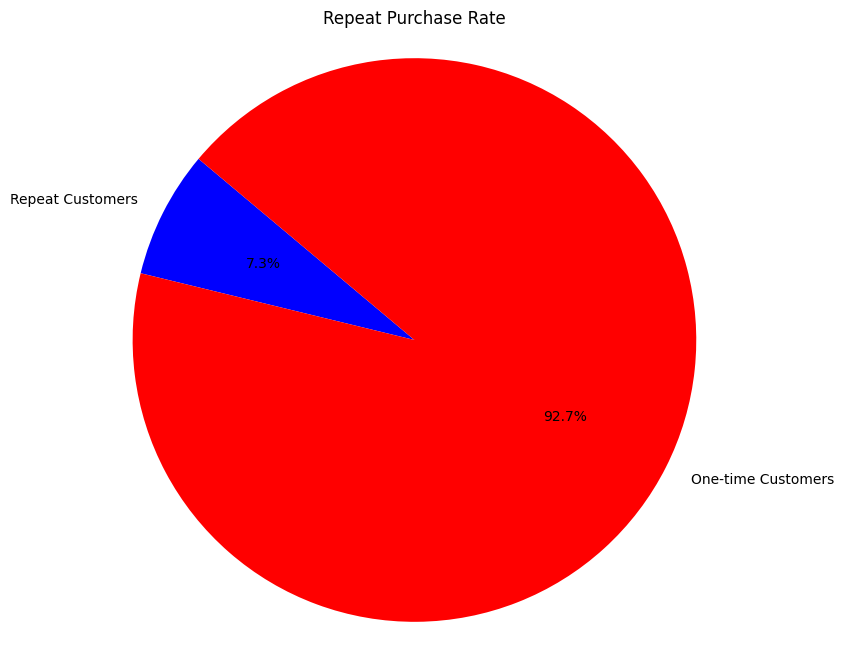

In [ ]:
labels = ['Repeat Customers', 'One-time Customers']
sizes = [repeat_customers, unique_customers - repeat_customers]
colors = ['blue', 'red']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Repeat Purchase Rate')
plt.axis('equal')
plt.show()

**Logistics and Shipping Analysis**
(1) most used courier service
(2) avg shipping/handling charge

The most used courier service is: flipkartlogistics with 206 orders


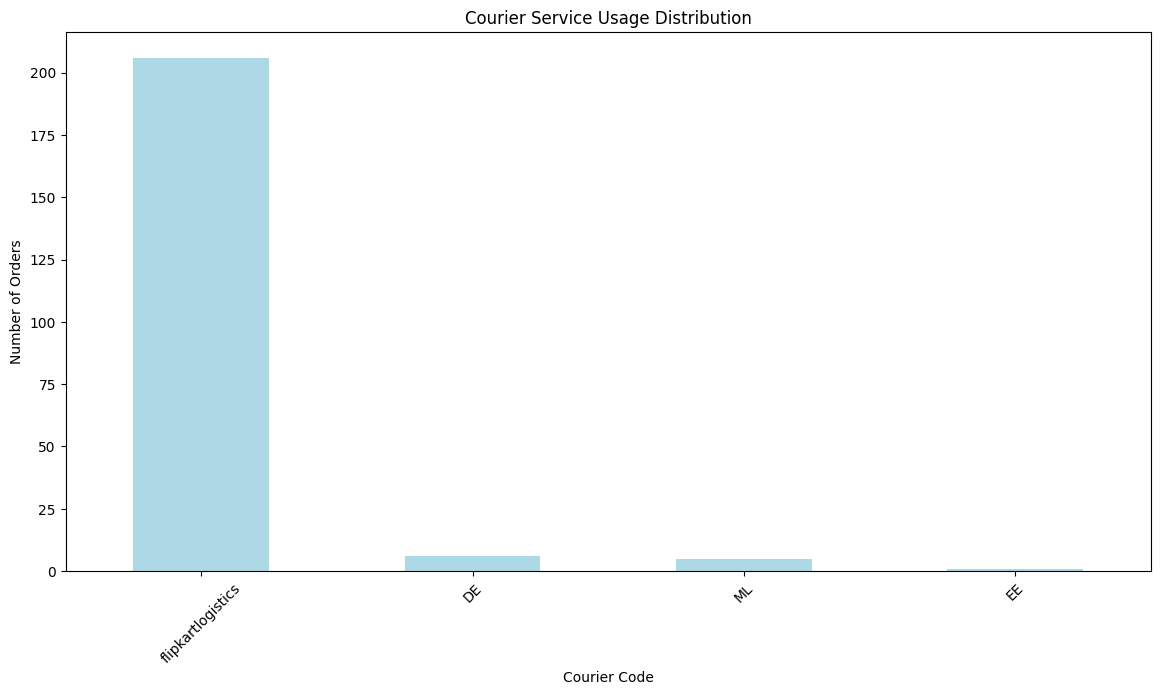

In [ ]:
courier_usage = df['Courier Code'].value_counts()

# Identify the most used courier service
most_used_courier = courier_usage.idxmax()
most_used_courier_count = courier_usage.max()

# Display the results
print(f'The most used courier service is: {most_used_courier} with {most_used_courier_count} orders')

plt.figure(figsize=(14, 7))
courier_usage.plot(kind='bar', color='lightblue')
plt.title('Courier Service Usage Distribution')
plt.xlabel('Courier Code')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


In [ ]:
df['Shipping Charge'] = pd.to_numeric(df['Shipping Charge'], errors='coerce')
average_shipping_charge = df['Shipping Charge'].mean()
print(f'Average Shipping Charge: {average_shipping_charge}')

Average Shipping Charge: 0.0


**Financial Metrics**
(1) Total MRP (2) Final Amount (3) Tax Recovery

In [ ]:
df['Total Mrp'] = pd.to_numeric(df['Total Mrp'], errors='coerce')
df['Final Amount'] = pd.to_numeric(df['Final Amount'], errors='coerce')
df['Tax Recovery'] = pd.to_numeric(df['Tax Recovery'], errors='coerce')

total_mrp = df['Total Mrp'].sum()
final_amount = df['Final Amount'].sum()
total_tax_recovered = df['Tax Recovery'].sum()

total_mrp, final_amount, total_tax_recovered

(1093041.5, 264136.5, 0)

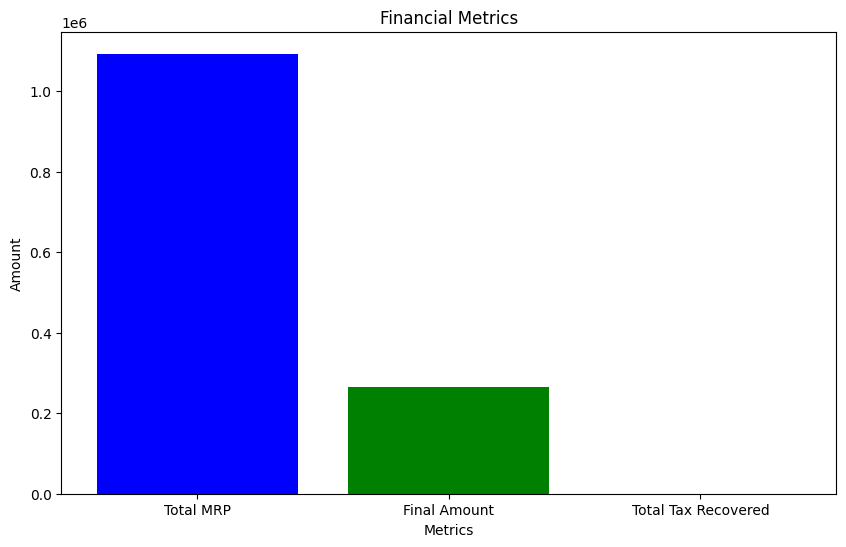

In [ ]:
metrics = ['Total MRP', 'Final Amount', 'Total Tax Recovered']
values = [total_mrp, final_amount, total_tax_recovered]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.title('Financial Metrics')
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.show()